In [2]:
import numpy as np
from cavity_codes.rfp2 import *
import pickle

## long cavity

In [12]:
ncar = 181
dgrid = 540e-6
xlamds = 1.261043e-10
zsep = 140
c_speed  = 299792458
nslice = 1024
isradi = 1
npadt = (8192 - nslice//isradi)//2
npad1 = (1024-ncar)//2
npadx = [int(npad1), int(npad1) + 1]
verbosity = True
dt = xlamds*isradi*zsep/c_speed
folder_name = 'data_long'

In [13]:

energy_list = []
maxpower_list = []
xrms_list = []
yrms_list = []
xfwhm_list = []
yfwhm_list = []
for  n in range(7):
    for round in range(1):
        filename = 'n' + str(n) + '_field_transmit_round' + str(round) +'.dfl'
        print(filename)
        fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
        energy_uJ, maxpower, trms, tfwhm, xrms, xfwhm, yrms, yfwhm = fld_info(fld, dgrid = dgrid, dt= dt)
        energy_list.append(energy_uJ)
        maxpower_list.append(maxpower)
        xrms_list.append(xrms)
        yrms_list.append(yrms)
        xfwhm_list.append(xfwhm)
        yfwhm_list.append(yfwhm)

        

n0_field_transmit_round0.dfl
5.7258312702178955 seconds to read in fld array (268378112,)
read 8192 slices
0.0011551380157470703 seconds to reshape fld array (8192, 181, 181)
energy = 14.811497916215uJ, peakpower = 3.050350777953GW, trms = 8.301792569606fs, tfwhm = 0.360679845639fs, xrms = 174.961143383933um, xfwhm = 574.180772133929um, yrms = 174.961143383933um, yfwhm = 571.059087333834um, 
n1_field_transmit_round0.dfl
5.199463605880737 seconds to read in fld array (268378112,)
read 8192 slices
8.106231689453125e-06 seconds to reshape fld array (8192, 181, 181)
energy = 17.441082362125uJ, peakpower = 2.478669194917GW, trms = 10.348834156922fs, tfwhm = 0.316601570714fs, xrms = 174.140439101229um, xfwhm = 573.588122514774um, yrms = 174.140439101229um, yfwhm = 572.198959425824um, 
n2_field_transmit_round0.dfl
5.384433031082153 seconds to read in fld array (268378112,)
read 8192 slices
6.67572021484375e-06 seconds to reshape fld array (8192, 181, 181)
energy = 99.240171822182uJ, peakpower

FileNotFoundError: [Errno 2] No such file or directory: 'data_long/n6_field_transmit_round0.dfl'

In [14]:
out_power = np.zeros((10*len(maxpower_list),))
out_power[::10] = np.array(maxpower_list)

In [16]:
data = pickle.load( open( folder_name + '/data_process/recir_info.p', "rb" ) )
power  = data[0]

In [ ]:
x = np.arange(len(power))
plt.plot(np.array(power),'.-', color = 'C2', label = 'w/o ebeam')
plt.plot(x[::10], np.array(power)[::10], 'o', label = 'w/ chirped ebeam')
plt.legend(fontsize = 11)
plt.yscale('log')
plt.xlabel('Time ($\mu s$)', fontsize =fontsize)
plt.ylabel('Recirculated Power (GW)', color = 'C2', fontsize=fontsize)
ax = plt.gca()
ax.tick_params(axis='y', labelsize=fontsize, colors = 'C2')
ax.tick_params(axis='x', labelsize=fontsize)
ax2 = ax.twinx()
ax2.plot(out_power, color = 'C1')
ax2.set_ylabel('Outcoupled Power (GW)', color = 'C1', fontsize = fontsize)
ax2.tick_params(axis='y', labelsize=fontsize, colors = 'C1')
plt.savefig(folder_name + '/data_process/' + 'recir_power.png',bbox_inches='tight')

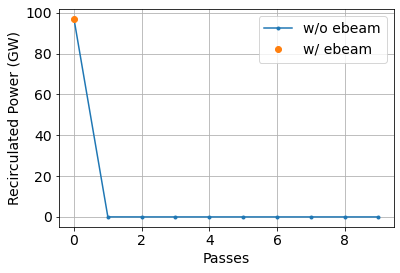

In [8]:
fontsize = 14
plt.plot(maxpower_list,'.-', label = 'w/o ebeam')

ax = plt.gca()
#ax.set_yscale('log')

x = np.arange(len(maxpower_list))
plt.plot(x[::10], maxpower_list[::10],'o', color = 'C1', label = 'w/ ebeam')
plt.xlabel('Passes', fontsize = fontsize)
plt.ylabel('Recirculated Power (GW)', fontsize = fontsize)
plt.xticks(fontsize= fontsize)
plt.yticks(fontsize = fontsize)
plt.legend(fontsize = fontsize)
plt.grid()
plt.savefig(folder_name + '/' + 'recir_power.png',bbox_inches='tight')

In [17]:
pickle.dump((maxpower_list, energy_list, xrms_list,yrms_list,xfwhm_list, yfwhm_list), open( folder_name + '/data_process/recir_info.p', "wb" ) )

In [7]:

spectra_list = []
power_list = []
for  n in [5]:
    filename = 'n' + str(n) + '_field_transmit_round0' +'.dfl'
    print(filename)
    fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
    energy_uJ, maxpower, trms, tfwhm, xrms, xfwhm, yrms, yfwhm = fld_info(fld, dgrid = dgrid, dt= dt)
    hws, spectra = get_spectrum(fld, dt, xlamds, npad = 100, onaxis=False)
    spectra_list.append((hws,spectra))
    power_GW = np.sum(np.abs(fld)**2, axis = (1,2))/1e9
    power_GW = power_GW[3000:-3000]
    t_fs = dt*np.arange(len(power_GW))/1e-15
    power_list.append((t_fs, power_GW))

    

n5_field_transmit_round0.dfl
5.195975303649902 seconds to read in fld array (268378112,)
read 8192 slices
7.867813110351562e-06 seconds to reshape fld array (8192, 181, 181)
energy = 2402.213418uJ, peakpower = 104.532649GW, trms = 21.065374fs, tfwhm = 18.363578fs, xrms = 45.742078um, xfwhm = 68.579283um, yrms = 45.742078um, yfwhm = 68.826779um, 


In [8]:
SASE = 'tap0.01_K1.172_nt22_nf10_t.out.dfl'
fld = read_dfl(filename = folder_name + '/'+SASE, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
hws_sase, spectra_sase = get_spectrum(fld, dt, xlamds, npad = 100, onaxis=False)

0.7365128993988037 seconds to read in fld array (34661138,)
read 1058 slices
0.0008308887481689453 seconds to reshape fld array (1058, 181, 181)


In [9]:
from Bragg_mirror import *
eph = np.linspace(9820,9845,2000)
theta_0 = 45.0*np.pi/180.
dtheta_0 = 10e-6
ntheta_0 = 2000
theta = np.linspace(theta_0-dtheta_0,theta_0+dtheta_0,ntheta_0)
R = Bragg_mirror(photon_energies_eV = eph, angles_rad = theta, reflectionQ=True, undo_slippageQ=True, undo_xshiftQ=True)

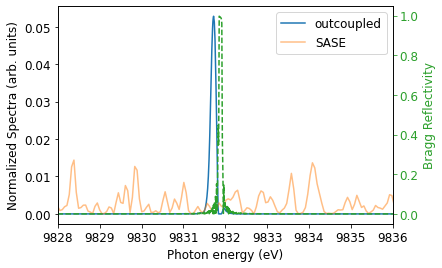

In [13]:
fontsize = 12
plt.figure(1)
plt.plot(hws,spectra,label = 'outcoupled')

plt.plot(hws_sase, spectra_sase, alpha = 0.5, label = 'SASE')
plt.xlabel('Photon energy (eV)', fontsize = fontsize)
plt.ylabel('Normalized Spectra (arb. units)', fontsize = fontsize)
plt.legend(fontsize = fontsize)
plt.xlim([9828, 9836])
plt.xticks(fontsize= fontsize)
plt.yticks(fontsize = fontsize)
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(eph, np.abs(R[1000,:])**2,'--',color = 'C2')
ax2.set_ylabel('Bragg Reflectivity', color = 'C2', fontsize = fontsize)
ax2.tick_params(axis='y', labelsize=fontsize, colors = 'C2')
plt.savefig(folder_name + '/data_process/' + 'spectra.png',bbox_inches='tight')

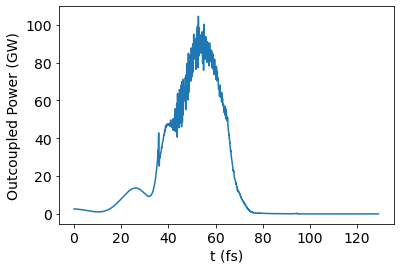

In [16]:
from scipy.signal import savgol_filter
power_GW_filtr = power_GW#savgol_filter(power_GW, 9, 3)
fontsize = 14
plt.plot(t_fs,  power_GW_filtr)
plt.xlabel('t (fs)', fontsize = fontsize)
#plt.xlim([0,100])
plt.ylabel('Outcoupled Power (GW)', fontsize = fontsize)
plt.xticks(fontsize= fontsize)
plt.yticks(fontsize = fontsize)
plt.savefig(folder_name + '/data_process/' + 'power.png', bbox_inches='tight')

## short cavity

In [61]:
ncar = 181
dgrid = 540e-6
w0 =40e-6
xlamds = 1.261043e-10
zsep = 200
c_speed  = 299792458
nslice = 710
isradi = 1
npadt = (4096 - nslice//isradi)//2
npad1 = (512-ncar)//2
npadx = [int(npad1), int(npad1) + 1]
verbosity = True
dt = xlamds*isradi*zsep/c_speed
folder_name = 'data_short3'

In [63]:
energy_list = []
maxpower_list = []
xrms_list = []
yrms_list = []
xfwhm_list = []
yfwhm_list = []
for n in range(6):
    for round in range(30):
        filename = 'n' + str(n) + '_field_round' + str(round) +'.dfl'
        print(filename)
        fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
        energy_uJ, maxpower, trms, tfwhm, xrms, xfwhm, yrms, yfwhm = fld_info(fld, dgrid = dgrid, dt= dt)
        energy_list.append(energy_uJ)
        maxpower_list.append(maxpower)
        xrms_list.append(xrms)
        yrms_list.append(yrms)
        xfwhm_list.append(xfwhm)
        yfwhm_list.append(yfwhm)

n0_field_round0.dfl
0.47657155990600586 seconds to read in fld array (134189056,)
read 4096 slices
6.198883056640625e-06 seconds to reshape fld array (4096, 181, 181)
energy = 0.000801050255uJ, peakpower = 1.2726628e-05GW, trms = 40.05334516114fs, tfwhm = 54.107763026222fs, xrms = 74.81897785421um, xfwhm = 119.690403596752um, yrms = 74.81897785421um, yfwhm = 78.634280818611um, 
n0_field_round1.dfl
1.7341163158416748 seconds to read in fld array (134189056,)
read 4096 slices
5.9604644775390625e-06 seconds to reshape fld array (4096, 181, 181)
energy = 0.000558388462uJ, peakpower = 7.235932e-06GW, trms = 46.34934525579fs, tfwhm = 64.71032909337fs, xrms = 57.278775496331um, xfwhm = 92.45338136538um, yrms = 57.278775496331um, yfwhm = 50.599445058396um, 
n0_field_round2.dfl
1.9321837425231934 seconds to read in fld array (134189056,)
read 4096 slices
5.245208740234375e-06 seconds to reshape fld array (4096, 181, 181)
energy = 0.000503827787uJ, peakpower = 5.697744e-06GW, trms = 52.566315879

In [17]:
data = (maxpower_list, energy_list, xrms_list,yrms_list,xfwhm_list, yfwhm_list)
pickle.dump(data, open( folder_name + '/recir_info.p', "wb" ) )

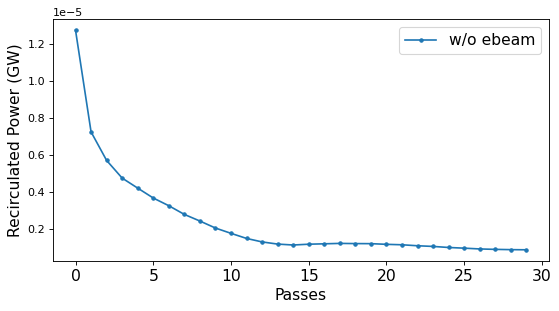

In [68]:
plt.figure(figsize=(8, 4), dpi=80)
fontsize = 14
plt.plot(maxpower_list[:30],'.-', label = 'w/o ebeam')

ax = plt.gca()
#ax.set_yscale('log')


x = np.arange(len(maxpower_list))
#plt.plot(x[::30], maxpower_list[::30],'o', color = 'C2', label = 'w/ flat ebeam')
#plt.plot(x[::180], maxpower_list[::180],'o', color = 'C1', label = 'w/ chirped ebeam')
#plt.plot(x[0], maxpower_list[0],'o', color = 'C2')
#plt.xlim([170,220])
plt.xlabel('Passes', fontsize = fontsize)
plt.ylabel('Recirculated Power (GW)', fontsize = fontsize)
plt.xticks(fontsize= fontsize)
#plt.yticks([1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1],fontsize = fontsize)
plt.legend(fontsize = fontsize)
#plt.grid()
plt.savefig(folder_name + '/' + 'recir_power.png',bbox_inches='tight')

In [19]:
energy_list2 = []
maxpower_list2 = []
xrms_list2 = []
yrms_list2 = []
xfwhm_list2 = []
yfwhm_list2 = []
for  n in range(24):
    for round in range(1):
        filename = 'n' + str(n) + '_field_transmit_round' + str(round) +'.dfl'
        print(filename)
        fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
        energy_uJ, maxpower, trms, tfwhm, xrms, xfwhm, yrms, yfwhm = fld_info(fld, dgrid = dgrid, dt= dt)
        energy_list2.append(energy_uJ)
        maxpower_list2.append(maxpower)
        xrms_list2.append(xrms)
        yrms_list2.append(yrms)
        xfwhm_list2.append(xfwhm)
        yfwhm_list2.append(yfwhm)

n0_field_transmit_round0.dfl
3.9362237453460693 seconds to read in fld array (134156295,)
read 4095 slices
0.001661539077758789 seconds to reshape fld array (4095, 181, 181)
energy = 0.884055893705uJ, peakpower = 0.123167945201GW, trms = 10.131849614921fs, tfwhm = 0.294200570961fs, xrms = 34.66045587629um, xfwhm = 84.514512842681um, yrms = 34.66045587629um, yfwhm = 86.413514802031um, 
n1_field_transmit_round0.dfl
4.076000213623047 seconds to read in fld array (134156295,)
read 4095 slices
1.4781951904296875e-05 seconds to reshape fld array (4095, 181, 181)
energy = 0.900282885254uJ, peakpower = 0.160712856211GW, trms = 10.750416534916fs, tfwhm = 0.655687463119fs, xrms = 34.530209331122um, xfwhm = 84.772883822313um, yrms = 34.530209331122um, yfwhm = 83.866312001828um, 
n2_field_transmit_round0.dfl
3.6057872772216797 seconds to read in fld array (134156295,)
read 4095 slices
1.1444091796875e-05 seconds to reshape fld array (4095, 181, 181)
energy = 0.873099682485uJ, peakpower = 0.0923846

In [20]:
data = (maxpower_list2, energy_list2, xrms_list2,yrms_list2,xfwhm_list2, yfwhm_list2)
pickle.dump(data, open( folder_name + '/extract_info.p', "wb" ) )

In [23]:
out_power = np.zeros((30*len(maxpower_list2),))
out_power[::30] = np.array(maxpower_list2)

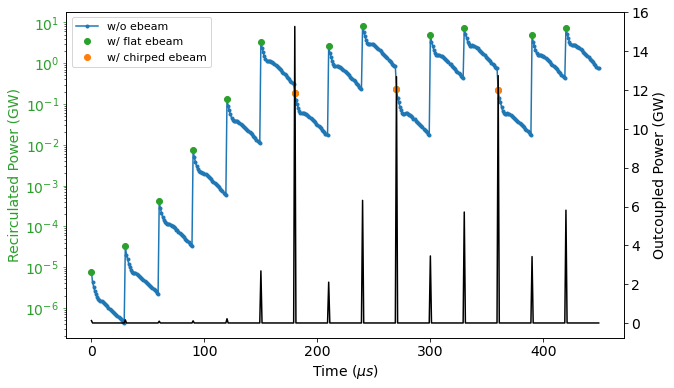

In [63]:
plt.figure(figsize = (10,6))
power = maxpower_list[:270]
power = np.concatenate((power,maxpower_list[360:450]))
power = np.concatenate((power,maxpower_list[540:630]))
x = np.arange(len(power))
plt.plot(np.array(power),'.-', label = 'w/o ebeam')
plt.plot(x[::30], power[::30],'o', color = 'C2', label = 'w/ flat ebeam')
plt.plot([x[180],x[270],x[360]], [power[180], power[270], power[360]], 'o', label = 'w/ chirped ebeam')
plt.legend(fontsize = 11)
plt.yscale('log')
plt.xlabel('Time ($\mu s$)', fontsize =fontsize)
plt.ylabel('Recirculated Power (GW)', color = 'C2', fontsize=fontsize)
ax = plt.gca()
ax.tick_params(axis='y', labelsize=fontsize, colors = 'C2')
ax.tick_params(axis='x', labelsize=fontsize)
ax2 = ax.twinx()

out_power2 = out_power[:270]
out_power2 = np.concatenate((out_power2,out_power[360:450]))
out_power2  = np.concatenate((out_power2,out_power[540:630]))
ax2.plot(out_power2, '-',color = 'k')
ax2.set_ylabel('Outcoupled Power (GW)', color = 'k', fontsize = fontsize)
#ax2.set_yscale('log')
ax2.tick_params(axis='y', labelsize=fontsize, colors = 'k')
#plt.savefig(folder_name + '/data_process/' + 'recir_power.png',bbox_inches='tight')

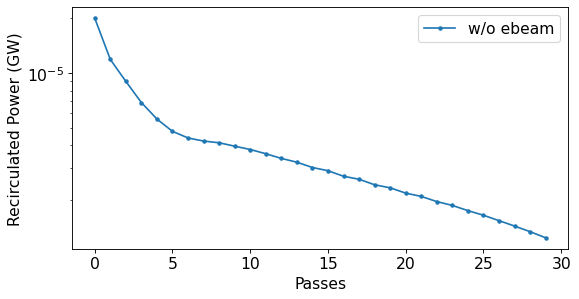

In [28]:
plt.figure(figsize=(8, 4), dpi=80)
fontsize = 14
plt.plot(maxpower_list[:30],'.-', label = 'w/o ebeam')

ax = plt.gca()
ax.set_yscale('log')




#plt.xlim([170,220])
plt.xlabel('Passes', fontsize = fontsize)
plt.ylabel('Recirculated Power (GW)', fontsize = fontsize)
plt.xticks(fontsize= fontsize)
plt.yticks(fontsize = fontsize)
plt.legend(fontsize = fontsize)
#plt.xlim([0,29])
#plt.grid()

In [9]:
filename = 'n11_field_transmit_round0' +'.dfl'
fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
energy_uJ, maxpower, trms, tfwhm, xrms, xfwhm, yrms, yfwhm = fld_info(fld, dgrid = dgrid, dt= dt)
hws, spectra = get_spectrum(fld, dt, xlamds, npad = 100, onaxis=False)
power_GW = np.sum(np.abs(fld)**2, axis = (1,2))/1e9
power_GW = power_GW[1000:-1000]
t_fs = dt*np.arange(len(power_GW))/1e-15

1.7940940856933594 seconds to read in fld array (134156295,)
read 4095 slices
7.3909759521484375e-06 seconds to reshape fld array (4095, 181, 181)
energy = 91.383172903231uJ, peakpower = 4.930897814512GW, trms = 74.531192219255fs, tfwhm = 1.211478283431fs, xrms = 65.897656459296um, xfwhm = 75.79442660956um, yrms = 65.897656459296um, yfwhm = 55.114938899191um, 


In [10]:
from Bragg_mirror import *
eph = np.linspace(9831,9833,int(5e3-1))
theta_0 = 45.0*np.pi/180.
dtheta_0 = 10e-6
ntheta_0 = int(5e3+1)
theta = np.linspace(theta_0-dtheta_0,theta_0+dtheta_0,ntheta_0)
R = Bragg_mirror(photon_energies_eV = eph, angles_rad = theta, reflectionQ=True, undo_slippageQ=True, undo_xshiftQ=True)

5.7770925916231105e-06


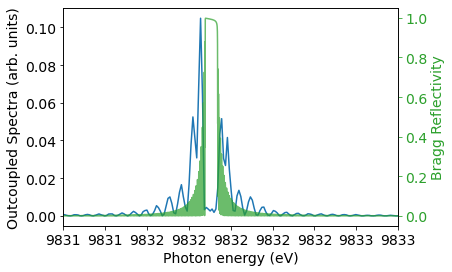

In [11]:
from matplotlib.ticker import FormatStrFormatter
fontsize = 14
plt.figure(1)
plt.plot(hws,spectra)

#plt.plot(hws_sase, spectra_sase, alpha = 0.5, label = 'SASE')
plt.xlabel('Photon energy (eV)', fontsize = fontsize)
plt.ylabel('Outcoupled Spectra (arb. units)', fontsize = fontsize)
plt.xlim([9831, 9833])
plt.xticks(fontsize= fontsize)
plt.yticks(fontsize = fontsize)
ax = plt.gca()
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2 = ax.twinx()
ax2.plot(eph, np.abs(R[2501,:])**2,alpha = 0.7,color = 'C2')
ax2.set_ylabel('Bragg Reflectivity', color = 'C2', fontsize = fontsize)
ax2.tick_params(axis='y', labelsize=fontsize, colors = 'C2')
plt.savefig(folder_name  + '/spectra.pdf',bbox_inches='tight')

norm = 1086243134631.3655     energy = 60.9  uJ    t , y  mean = -20.3 fs , 0.4 um      t , y  rms = 49.7 fs , 19.7 um     wt , wy = 99.4 fs , 39.4 um     t , y  fwhm = 0.8 fs , 40.8 um


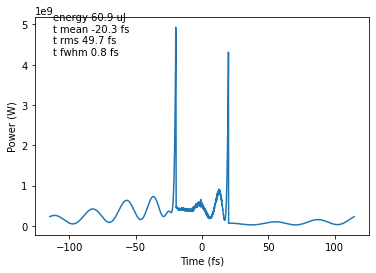

In [12]:
plot_fld_power(fld, dt*2/3)

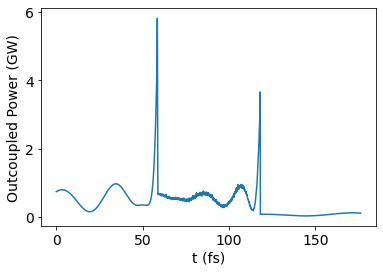

In [88]:
from scipy.signal import savgol_filter
power_GW_filtr = power_GW#savgol_filter(power_GW, 9, 3)
fontsize = 14
plt.plot(t_fs,  power_GW_filtr)
plt.xlabel('t (fs)', fontsize = fontsize)
#plt.xlim([0,100])
plt.ylabel('Outcoupled Power (GW)', fontsize = fontsize)
plt.xticks(fontsize= fontsize)
plt.yticks(fontsize = fontsize)
plt.savefig(folder_name + '/' + 'power.pdf', bbox_inches='tight')

n23_field_transmit_round0.dfl
4.379029750823975 seconds to read in fld array (134156295,)
read 4095 slices
0.0013120174407958984 seconds to reshape fld array (4095, 181, 181)


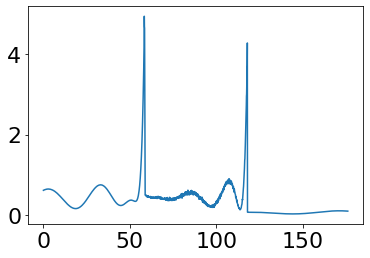

In [30]:
filename = 'n' + str(n) + '_field_transmit_round' + str(0) +'.dfl'
print(filename)
fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
power_GW = np.sum(np.abs(fld)**2, axis = (1,2))/1e9
power_GW = power_GW[1000:-1000]
t_fs = dt*np.arange(len(power_GW))/1e-15
plt.plot(t_fs, power_GW)

In [14]:
filename = 'tap0.006_K1.172_n11.out.dfl'
fld = read_dfl(filename = folder_name + '/'+filename, ncar=361, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
plot_fld_power(fld, dt)
hws, spectra = get_spectrum(fld, dt, xlamds, npad = 1000, onaxis=False)
plt.figure(10)
plt.plot(hws,spectra)

#plt.plot(hws_sase, spectra_sase, alpha = 0.5, label = 'SASE')
plt.xlabel('Photon energy (eV)', fontsize = fontsize)
plt.ylabel('Outcoupled Spectra (arb. units)', fontsize = fontsize)
plt.xlim([9831, 9833])
plt.xticks(fontsize= fontsize)
plt.yticks(fontsize = fontsize)
ax = plt.gca()
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2 = ax.twinx()
ax2.plot(eph, np.abs(R[2501,:])**2,alpha = 0.7,color = 'C2')
ax2.set_ylabel('Bragg Reflectivity', color = 'C2', fontsize = fontsize)
ax2.tick_params(axis='y', labelsize=fontsize, colors = 'C2')
plt.savefig(folder_name  + '/spectra.pdf',bbox_inches='tight')

0.40934085845947266 seconds to read in fld array (23620681,)
read 181 slices


ValueError: cannot reshape array of size 23620681 into shape (181,361,361)

In [97]:
(561-476)/2

42.5

In [78]:
4096*2

8192

1.7817771434783936 seconds to read in fld array (134189056,)
read 4096 slices
6.67572021484375e-06 seconds to reshape fld array (4096, 181, 181)
energy = 0.00040463789uJ, peakpower = 3.669219e-06GW, trms = 67.39912121127fs, tfwhm = 78.279487119539fs, xrms = 43.973347723988um, xfwhm = 63.766015534279um, yrms = 43.973347723988um, yfwhm = 40.213277174113um, 
norm = 4809803.77669345     energy = 0.0  uJ    t , y  mean = -28.6 fs , -15.0 um      t , y  rms = 67.4 fs , 95.9 um     wt , wy = 134.8 fs , 191.8 um     t , y  fwhm = 78.3 fs , 29.8 um


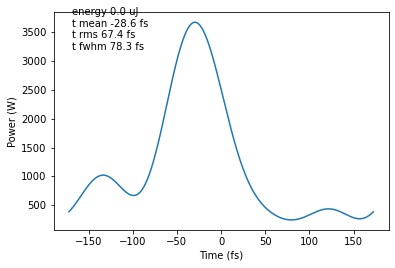

1.908442735671997 seconds to read in fld array (134189056,)
read 4096 slices
6.4373016357421875e-06 seconds to reshape fld array (4096, 181, 181)
energy = 0.000383585789uJ, peakpower = 3.25261e-06GW, trms = 70.863630518796fs, tfwhm = 80.770393098494fs, xrms = 42.119715224929um, xfwhm = 57.001375948974um, yrms = 42.119715224929um, yfwhm = 42.990049410089um, 
norm = 4559564.04707215     energy = 0.0  uJ    t , y  mean = -27.7 fs , 15.1 um      t , y  rms = 70.9 fs , 94.6 um     wt , wy = 141.8 fs , 189.2 um     t , y  fwhm = 80.8 fs , 31.8 um


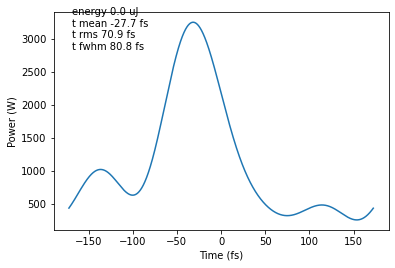

2.0604898929595947 seconds to read in fld array (134189056,)
read 4096 slices
6.198883056640625e-06 seconds to reshape fld array (4096, 181, 181)
energy = 0.000362615519uJ, peakpower = 2.783938e-06GW, trms = 75.168776338421fs, tfwhm = 85.314345673863fs, xrms = 41.903877691392um, xfwhm = 56.09643855585um, yrms = 41.903877691392um, yfwhm = 34.322286591951um, 
norm = 4310297.016404418     energy = 0.0  uJ    t , y  mean = -25.4 fs , -15.0 um      t , y  rms = 75.2 fs , 93.5 um     wt , wy = 150.4 fs , 187.0 um     t , y  fwhm = 85.3 fs , 25.4 um


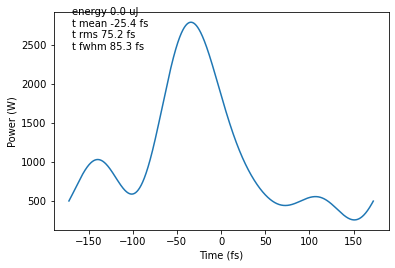

1.7295398712158203 seconds to read in fld array (134189056,)
read 4096 slices
5.7220458984375e-06 seconds to reshape fld array (4096, 181, 181)
energy = 0.00034492811uJ, peakpower = 2.426466e-06GW, trms = 78.028159936738fs, tfwhm = 91.619710759499fs, xrms = 40.586186161041um, xfwhm = 53.736211183137um, yrms = 40.586186161041um, yfwhm = 35.090355770021um, 
norm = 4100052.3353865533     energy = 0.0  uJ    t , y  mean = -23.2 fs , 15.3 um      t , y  rms = 78.0 fs , 93.0 um     wt , wy = 156.0 fs , 186.0 um     t , y  fwhm = 91.6 fs , 26.0 um


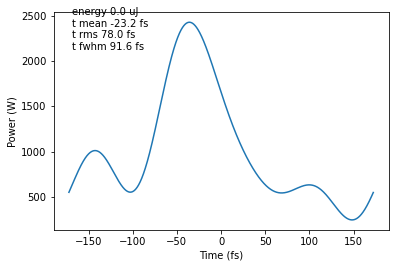

1.8501360416412354 seconds to read in fld array (134189056,)
read 4096 slices
5.7220458984375e-06 seconds to reshape fld array (4096, 181, 181)
energy = 0.000327719468uJ, peakpower = 2.048854e-06GW, trms = 81.076018150859fs, tfwhm = 104.124439256219fs, xrms = 40.34730427633um, xfwhm = 59.699570686219um, yrms = 40.34730427633um, yfwhm = 37.485747172637um, 
norm = 3895498.5998570467     energy = 0.0  uJ    t , y  mean = -19.5 fs , -16.0 um      t , y  rms = 81.1 fs , 92.6 um     wt , wy = 162.2 fs , 185.2 um     t , y  fwhm = 104.1 fs , 27.8 um


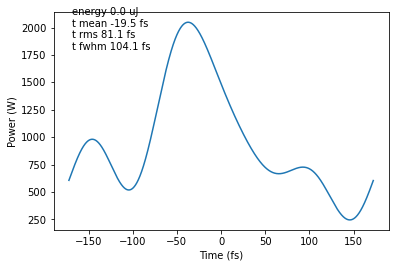

In [77]:
ncar = 181
dgrid = 540e-6
xlamds = 1.261043e-10
zsep = 200
c_speed  = 299792458
nslice = 710
isradi = 1
npadt = (4096 - nslice//isradi)//2
npad1 = (512-ncar)//2
npadx = [int(npad1), int(npad1) + 1]
verbosity = True
dt = xlamds*isradi*zsep/c_speed
folder_name = 'data_short3'
for k in range(5,10):
    filename = 'n0_field_round' + str(k) +'.dfl'
    fld = read_dfl(filename = folder_name + '/'+filename, ncar=ncar, verboseQ=1, conjugate_field_for_genesis=False, swapxyQ=False)
    energy_uJ, maxpower, trms, tfwhm, xrms, xfwhm, yrms, yfwhm = fld_info(fld, dgrid = dgrid, dt= dt)
    plot_fld_power(fld, dt)

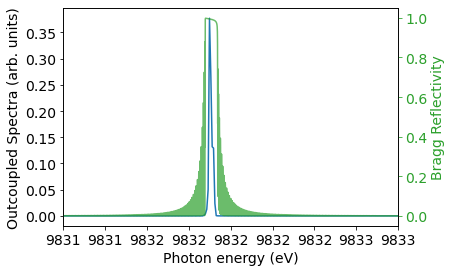

In [46]:
hws, spectra = get_spectrum(fld, dt, xlamds, npad = 1000, onaxis=False)
plt.figure(10)
plt.plot(hws,spectra)

#plt.plot(hws_sase, spectra_sase, alpha = 0.5, label = 'SASE')
plt.xlabel('Photon energy (eV)', fontsize = fontsize)
plt.ylabel('Outcoupled Spectra (arb. units)', fontsize = fontsize)
plt.xlim([9831, 9833])
plt.xticks(fontsize= fontsize)
plt.yticks(fontsize = fontsize)
ax = plt.gca()
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2 = ax.twinx()
ax2.plot(eph, np.abs(R[2501,:])**2,alpha = 0.7,color = 'C2')
ax2.set_ylabel('Bragg Reflectivity', color = 'C2', fontsize = fontsize)
ax2.tick_params(axis='y', labelsize=fontsize, colors = 'C2')
plt.savefig(folder_name  + '/spectra.pdf',bbox_inches='tight')